In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Ames_without_outliers.scv')

In [28]:
df.head()

,Unnamed: 0,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [38]:
with open('Ames_Housing_Feature_Description.txt', 'r') as f:
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [29]:
df = df.drop(['Unnamed: 0', 'PID'], axis = 1)

In [44]:
def percent_missing(df):
    percent_nan = 100* df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

In [45]:
missing = percent_missing(df)

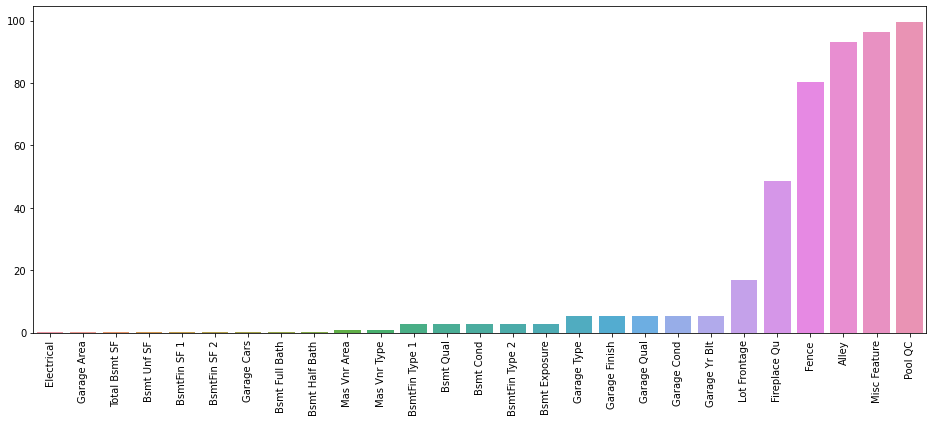

In [32]:
plt.figure(figsize = (16,6))
sns.barplot(x = missing.index, y = missing)
plt.xticks(rotation = 90);

### Features which are missing a little data

(0.0, 1.0)

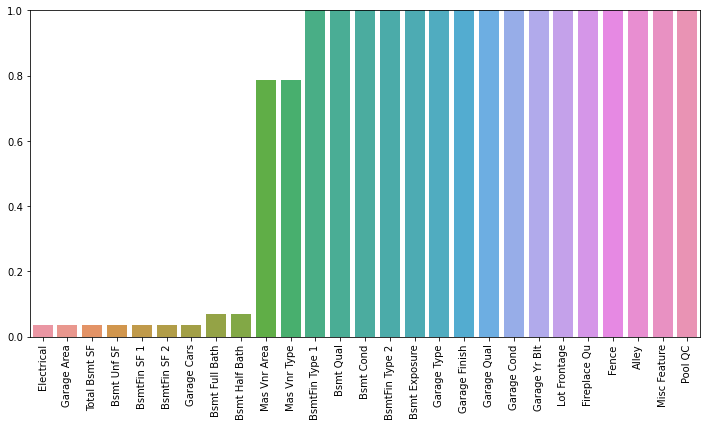

In [33]:
plt.figure(figsize = (12,6))
sns.barplot(x = missing.index, y = missing)
plt.xticks(rotation = 90);
plt.ylim(0,1)

In [41]:
df['Electrical'] = df['Electrical'].fillna('none')

In [47]:
# percent_missing

(0.0, 1.0)

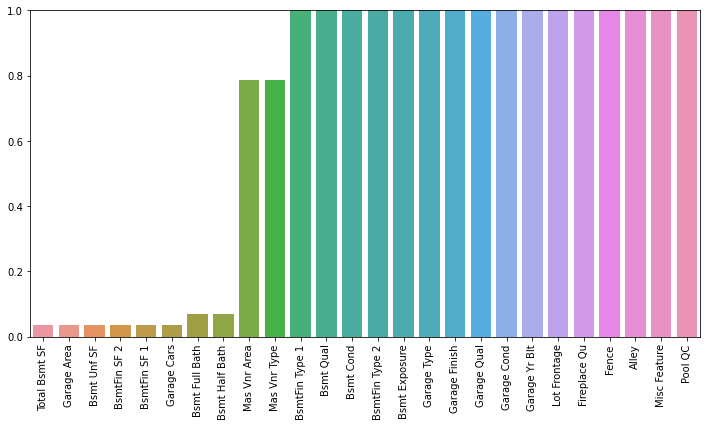

In [46]:
missing = percent_missing(df)
plt.figure(figsize = (12,6))
sns.barplot(x = missing.index, y = missing)
plt.xticks(rotation = 90);
plt.ylim(0,1)

In [49]:
df[df['Total Bsmt SF'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000


In [52]:
num = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']
string = []

In [58]:
bsmt_num_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']
df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)

In [60]:
bsmt_str_cols =  ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')

(0.0, 1.0)

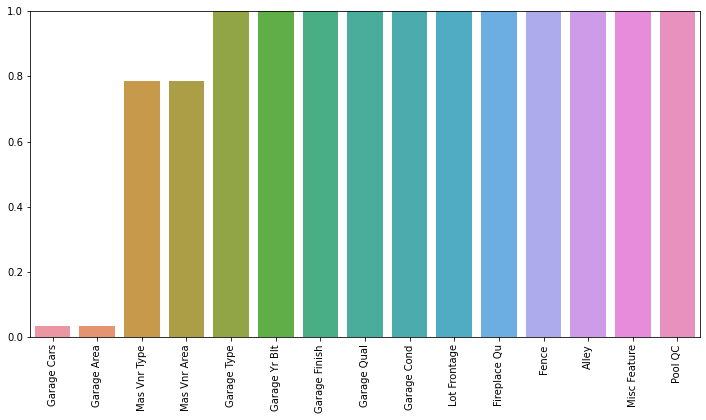

In [61]:
missing = percent_missing(df)
plt.figure(figsize = (12,6))
sns.barplot(x = missing.index, y = missing)
plt.xticks(rotation = 90);
plt.ylim(0,1)

In [64]:
grg_num_cols = ['Garage Cars','Garage Area']
df[grg_num_cols] = df[grg_num_cols].fillna(0)

In [ ]:
grg_str_cols = []

(0.0, 1.0)

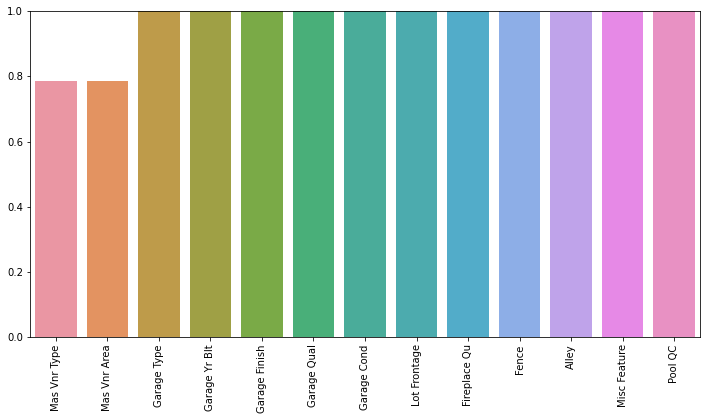

In [65]:
missing = percent_missing(df)
plt.figure(figsize = (12,6))
sns.barplot(x = missing.index, y = missing)
plt.xticks(rotation = 90);
plt.ylim(0,1)

In [85]:
df['Mas Vnr Type'] = df['Mas Vnr Type'].fillna('none')
df['Mas Vnr Area'] = df['Mas Vnr Area'].fillna(0)

                                               


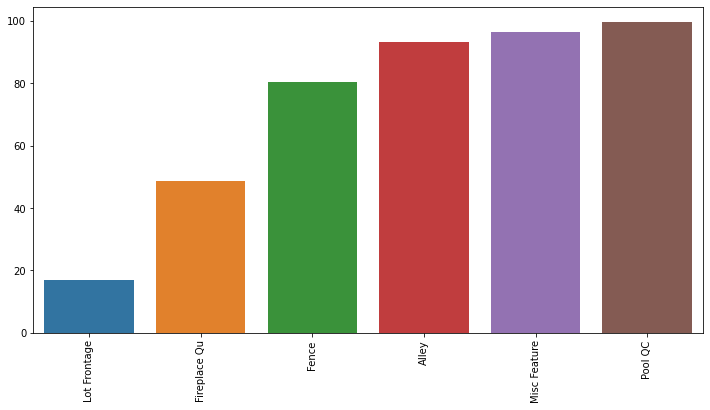

In [86]:
missing = percent_missing(df)
plt.figure(figsize = (12,6))
sns.barplot(x = missing.index, y = missing)
plt.xticks(rotation = 90);

In [73]:
string = ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']

In [74]:
df[string] = df[string].fillna('none')

In [81]:
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(1978)

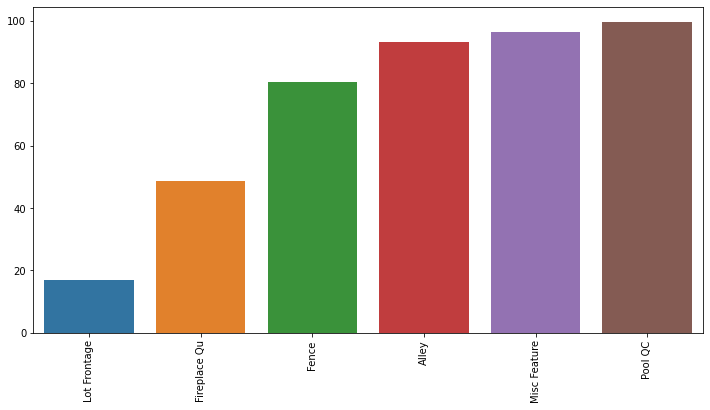

In [84]:
missing = percent_missing(df)
plt.figure(figsize = (12,6))
sns.barplot(x = missing.index, y = missing)
plt.xticks(rotation = 90);

In [87]:
df = df.drop(['Pool QC','Misc Feature','Alley','Fence'],axis=1)

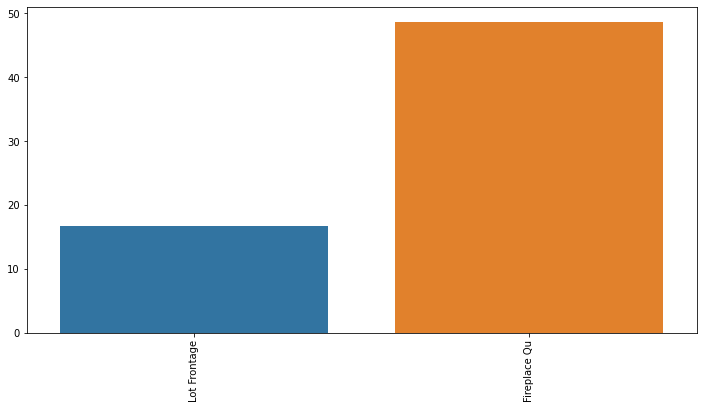

In [88]:
missing = percent_missing(df)
plt.figure(figsize = (12,6))
sns.barplot(x = missing.index, y = missing)
plt.xticks(rotation = 90);

In [89]:
df['Fireplace Qu'] = df['Fireplace Qu'].fillna("None")

In [90]:
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda val: val.fillna(val.mean()))

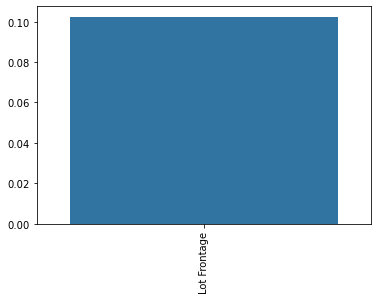

In [92]:
missing = percent_missing(df)
sns.barplot(x = missing.index, y = missing)
plt.xticks(rotation = 90);

In [93]:
df['Lot Frontage'] = df['Lot Frontage'].fillna(0)

In [94]:
missing = percent_missing(df)

In [95]:
missing

Series([], dtype: float64)

In [96]:
df.to_csv('Ames_without_nulls.csv',index = False)